# Importing DESI Data from NERSC #

In [2]:
from astropy.table import Table
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r.fits")
data.pprint(max_lines=-1, max_width=-1)

    SNID         TARGETID     CSV_zCMB  CSV_MU CSV_MUERR_FINAL CSV_zHD   SOURCE          RESIDUAL          VDISP     LOGMSTAR    DN4000       SFR      ABSMAG01_SDSS_G ABSMAG01_SDSS_R
----------- ----------------- -------- ------- --------------- ------- ---------- ---------------------- ---------- ---------- ---------- ------------ --------------- ---------------
ASASSN-16aj 39627409816815868  0.03053 35.5339          0.1156 0.02953 FOUNDATION   -0.02393931326094645  244.91797  11.028851   2.072362          0.0      -20.062872       -21.04509
   AT2017lm 39627426984103159  0.03002 35.6613          0.1253 0.03031 FOUNDATION    0.04561110721569861      125.0   9.771639  1.2024199   0.45696223      -18.646887         -19.171
ASASSN-15bc 39627569078734155  0.03639 36.1891          0.1239 0.03753 FOUNDATION    0.09806406856900907  100.99554  10.133713  1.2137947   0.65732723      -19.627703       -20.11592
    1303952 39627616537284425  0.56262 42.5951          0.1521 0.56262        DES    

# Adding LogSSFR #

In [ ]:
import numpy as np
from astropy.table import Table

# Read original FITS table
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r.fits")

# Compute log(sSFR) = log10(SFR) - log10(M_star)
with np.errstate(divide='ignore', invalid='ignore'):
    log_sSFR = np.log10(data["SFR"]) - data["LOGMSTAR"]

# Add new column to table
data["LOGSSFR"] = log_sSFR

# Write to new FITS file
output_path = "residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR.fits"
data.write(output_path, overwrite=True)
print(f"Saved updated table with LOGSSFR to {output_path}")


 LOGSSFR  
----------
        --
-10.111758
-10.315931
-11.157712
-11.373701
Saved updated table with LOGSSFR to residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR.fits


In [8]:
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR.fits")
data.pprint(max_lines=-1, max_width=-1)

    SNID         TARGETID     CSV_zCMB  CSV_MU CSV_MUERR_FINAL CSV_zHD   SOURCE          RESIDUAL          VDISP     LOGMSTAR    DN4000       SFR      ABSMAG01_SDSS_G ABSMAG01_SDSS_R  LOGSSFR  
----------- ----------------- -------- ------- --------------- ------- ---------- ---------------------- ---------- ---------- ---------- ------------ --------------- --------------- ----------
ASASSN-16aj 39627409816815868  0.03053 35.5339          0.1156 0.02953 FOUNDATION   -0.02393931326094645  244.91797  11.028851   2.072362          0.0      -20.062872       -21.04509         --
   AT2017lm 39627426984103159  0.03002 35.6613          0.1253 0.03031 FOUNDATION    0.04561110721569861      125.0   9.771639  1.2024199   0.45696223      -18.646887         -19.171 -10.111758
ASASSN-15bc 39627569078734155  0.03639 36.1891          0.1239 0.03753 FOUNDATION    0.09806406856900907  100.99554  10.133713  1.2137947   0.65732723      -19.627703       -20.11592 -10.315931
    1303952 39627616537284425 

# ADDING MSTAR #

In [10]:

# Load your latest FITS file (with LOGSSFR)
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR.fits")

# Compute MSTAR
with np.errstate(invalid='ignore'):
    M_star = 10 ** data["LOGMSTAR"]

# Add to table
data["MSTAR"] = M_star

# Save the result
data.write("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar.fits", overwrite=True)

data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar.fits")
data.pprint(max_lines=-1, max_width=-1)


    SNID         TARGETID     CSV_zCMB  CSV_MU CSV_MUERR_FINAL CSV_zHD   SOURCE          RESIDUAL          VDISP     LOGMSTAR    DN4000       SFR      ABSMAG01_SDSS_G ABSMAG01_SDSS_R  LOGSSFR         MSTAR       
----------- ----------------- -------- ------- --------------- ------- ---------- ---------------------- ---------- ---------- ---------- ------------ --------------- --------------- ---------- ------------------
ASASSN-16aj 39627409816815868  0.03053 35.5339          0.1156 0.02953 FOUNDATION   -0.02393931326094645  244.91797  11.028851   2.072362          0.0      -20.062872       -21.04509         -- 106868707125.10353
   AT2017lm 39627426984103159  0.03002 35.6613          0.1253 0.03031 FOUNDATION    0.04561110721569861      125.0   9.771639  1.2024199   0.45696223      -18.646887         -19.171 -10.111758  5910699362.041148
ASASSN-15bc 39627569078734155  0.03639 36.1891          0.1239 0.03753 FOUNDATION    0.09806406856900907  100.99554  10.133713  1.2137947   0.657327

# ADDING ABSMAG01_SDSS_G - ABSMAG01_SDSS_R #

In [11]:
from astropy.table import Table
import numpy as np

# Load your most up-to-date file
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar.fits")

# Compute g - r color
with np.errstate(invalid='ignore'):
    color_gr = data["ABSMAG01_SDSS_G"] - data["ABSMAG01_SDSS_R"]

# Add to table
data["COLOR_G-R"] = color_gr

# Save to new file
output_path = "residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits"
data.write(output_path, overwrite=True)

# Load the updated FITS file
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")
data.pprint(max_lines=-1, max_width=-1)

    SNID         TARGETID     CSV_zCMB  CSV_MU CSV_MUERR_FINAL CSV_zHD   SOURCE          RESIDUAL          VDISP     LOGMSTAR    DN4000       SFR      ABSMAG01_SDSS_G ABSMAG01_SDSS_R  LOGSSFR         MSTAR         COLOR_G-R  
----------- ----------------- -------- ------- --------------- ------- ---------- ---------------------- ---------- ---------- ---------- ------------ --------------- --------------- ---------- ------------------ ------------
ASASSN-16aj 39627409816815868  0.03053 35.5339          0.1156 0.02953 FOUNDATION   -0.02393931326094645  244.91797  11.028851   2.072362          0.0      -20.062872       -21.04509         -- 106868707125.10353    0.9822178
   AT2017lm 39627426984103159  0.03002 35.6613          0.1253 0.03031 FOUNDATION    0.04561110721569861      125.0   9.771639  1.2024199   0.45696223      -18.646887         -19.171 -10.111758  5910699362.041148    0.5241127
ASASSN-15bc 39627569078734155  0.03639 36.1891          0.1239 0.03753 FOUNDATION    0.098064068

Spearman correlation between COLOR_G-R and RESIDUAL:
ρ (rho) = -0.2804
p-value = 0.02153


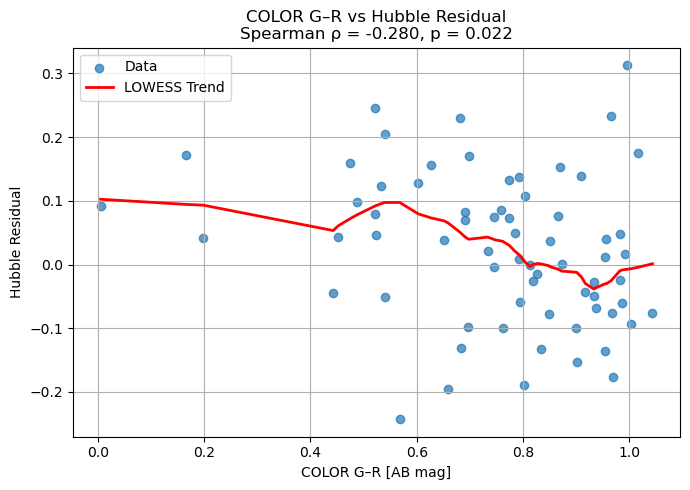

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # for LOWESS

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Build mask for valid COLOR_G-R and RESIDUAL
mask = (~data["COLOR_G-R"].mask if hasattr(data["COLOR_G-R"], "mask") else np.ones(len(data), dtype=bool)) & \
       (~data["RESIDUAL"].mask if hasattr(data["RESIDUAL"], "mask") else np.ones(len(data), dtype=bool))

x = np.array(data["COLOR_G-R"][mask])
y = np.array(data["RESIDUAL"][mask])

# Spearman correlation
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between COLOR_G-R and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("COLOR G–R [AB mag]")
plt.ylabel("Hubble Residual")
plt.title(f"COLOR G–R vs Hubble Residual\nSpearman ρ = {rho:.3f}, p = {pval:.3f}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()